<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Data" data-toc-modified-id="Import-Libraries-and-Data-1">Import Libraries and Data</a></span><ul class="toc-item"><li><span><a href="#Make-a-subset-of-the-dataframe" data-toc-modified-id="Make-a-subset-of-the-dataframe-1.1">Make a subset of the dataframe</a></span></li></ul></li><li><span><a href="#The-Elbow-Technique" data-toc-modified-id="The-Elbow-Technique-2">The Elbow Technique</a></span></li><li><span><a href="#k-Means-Clustering" data-toc-modified-id="k-Means-Clustering-3">k Means Clustering</a></span><ul class="toc-item"><li><span><a href="#Create-the-clusters" data-toc-modified-id="Create-the-clusters-3.1">Create the clusters</a></span></li><li><span><a href="#Plot-the-clusters" data-toc-modified-id="Plot-the-clusters-3.2">Plot the clusters</a></span><ul class="toc-item"><li><span><a href="#Discuss-how-and-why-the-clusters-make-sense" data-toc-modified-id="Discuss-how-and-why-the-clusters-make-sense-3.2.1">Discuss how and why the clusters make sense</a></span></li><li><span><a href="#Create-visualizations-using-the-clustered-data" data-toc-modified-id="Create-visualizations-using-the-clustered-data-3.2.2">Create visualizations using the clustered data</a></span></li><li><span><a href="#Calculate-descriptive-stats" data-toc-modified-id="Calculate-descriptive-stats-3.2.3">Calculate descriptive stats</a></span><ul class="toc-item"><li><span><a href="#Discuss-the-summary-statistics" data-toc-modified-id="Discuss-the-summary-statistics-3.2.3.1">Discuss the summary statistics</a></span></li></ul></li><li><span><a href="#Propose-what-these-results-could-be-useful-for-in-future-steps-of-an-analytics-pipeline." data-toc-modified-id="Propose-what-these-results-could-be-useful-for-in-future-steps-of-an-analytics-pipeline.-3.2.4">Propose what these results could be useful for in future steps of an analytics pipeline.</a></span></li></ul></li></ul></li></ul></div>

# Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# display graphs within the notebook
%matplotlib inline

In [5]:
# define a path
path = r'/Users/profkdfischer/World Happiness Report Analysis'

In [6]:
# import the cleaned dataframe from Exercise 6.1 on the World Happiness report
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'whr_df.csv'))

In [7]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [8]:
pd.set_option('display.precision', 2)

In [9]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.59,1.40,1.35,0.94,0.67,0.30,0.42,2015
1,Iceland,Western Europe,7.56,1.30,1.40,0.95,0.63,0.44,0.14,2015
2,Denmark,Western Europe,7.53,1.33,1.36,0.87,0.65,0.34,0.48,2015
3,Norway,Western Europe,7.52,1.46,1.33,0.89,0.67,0.35,0.37,2015
4,Canada,North America and ANZ,7.43,1.33,1.32,0.91,0.63,0.46,0.33,2015


In [10]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [11]:
df.shape

(1367, 10)

## Make a subset of the dataframe

In [12]:
# keep only the continous variables
df_k = df[['happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption']]

In [13]:
df_k.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,7.59,1.40,1.35,0.94,0.67,0.30,0.42
1,7.56,1.30,1.40,0.95,0.63,0.44,0.14
2,7.53,1.33,1.36,0.87,0.65,0.34,0.48
3,7.52,1.46,1.33,0.89,0.67,0.35,0.37
4,7.43,1.33,1.32,0.91,0.63,0.46,0.33


# The Elbow Technique

In [14]:
# give a range of potential clusters in the data
clust_num = range(1, 10) 

# for each number in the range, create a k model with that number of clusters
kmeans = [KMeans(n_clusters=i) for i in clust_num]

In [15]:
# for each k model, fit it to the df and calculate a score based on variation
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] 

# print out the scores
score

[-2288.5298891716625,
 -907.2754915241732,
 -613.6211253782914,
 -471.5428033603034,
 -400.86226402524875,
 -368.443516727133,
 -341.93914151258866,
 -318.52134926976555,
 -302.58782792162765]

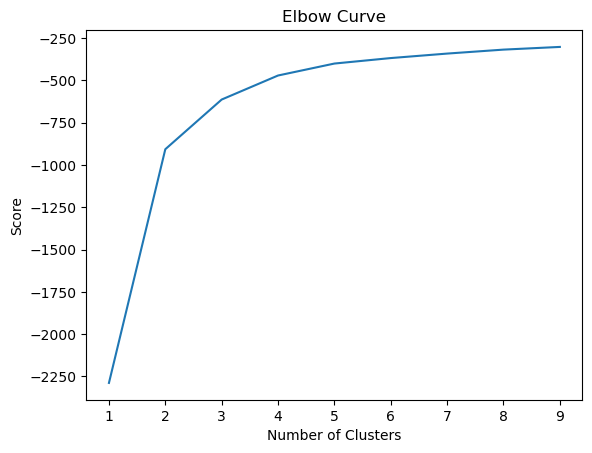

In [16]:
# Plot the elbow curve using PyLab.
pl.plot(clust_num,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Comment: I chose 4 as the optimal number of clusters because 3 is too low - the curve is still rising there. It seems to flatten out at 4.

# k Means Clustering

## Create the clusters

In [17]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [18]:
# Fit the k-means object to the data.
kmeans.fit(df_k)

KMeans(n_clusters=4)

In [19]:
# fit the kmean object to the data again and add the cluster number to the 'cluster' column
df_k['clusters'] = kmeans.fit_predict(df_k)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_9381/392992250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['clusters'] = kmeans.fit_predict(df_k)


In [20]:
df_k['clusters'].value_counts()

clusters
0    468
1    436
3    253
2    210
Name: count, dtype: int64

In [21]:
df['clusters'] = df_k['clusters']

In [22]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,clusters
0,Switzerland,Western Europe,7.59,1.40,1.35,0.94,0.67,0.30,0.42,2015,3
1,Iceland,Western Europe,7.56,1.30,1.40,0.95,0.63,0.44,0.14,2015,3
2,Denmark,Western Europe,7.53,1.33,1.36,0.87,0.65,0.34,0.48,2015,3
3,Norway,Western Europe,7.52,1.46,1.33,0.89,0.67,0.35,0.37,2015,3
4,Canada,North America and ANZ,7.43,1.33,1.32,0.91,0.63,0.46,0.33,2015,3


## Plot the clusters

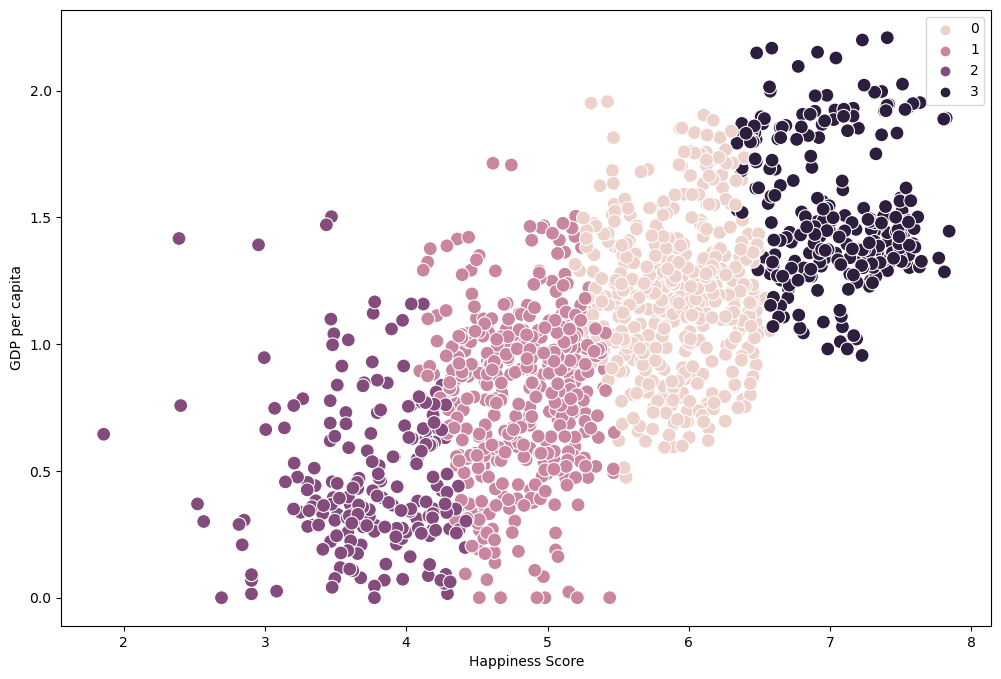

In [23]:
# Plot the clusters for the "happiness_score" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['happiness_score'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita') 
plt.show()

### Discuss how and why the clusters make sense

The clusters were clearly chosen on these two factors, or at least, mainly on these two factors, because this is the strongest correlation in the dataframe. It is clear that the clusters divide the dots cleanly into 4 groups. Value counts show that the groups on either end (clusters 0 and 1) are the smallest groups, with 200-250 dots each, while the 2 middle groups contain 430-470 dots each. Therefore the more extreme groups are smaller. The clusters probably line up with an IQ analysis.

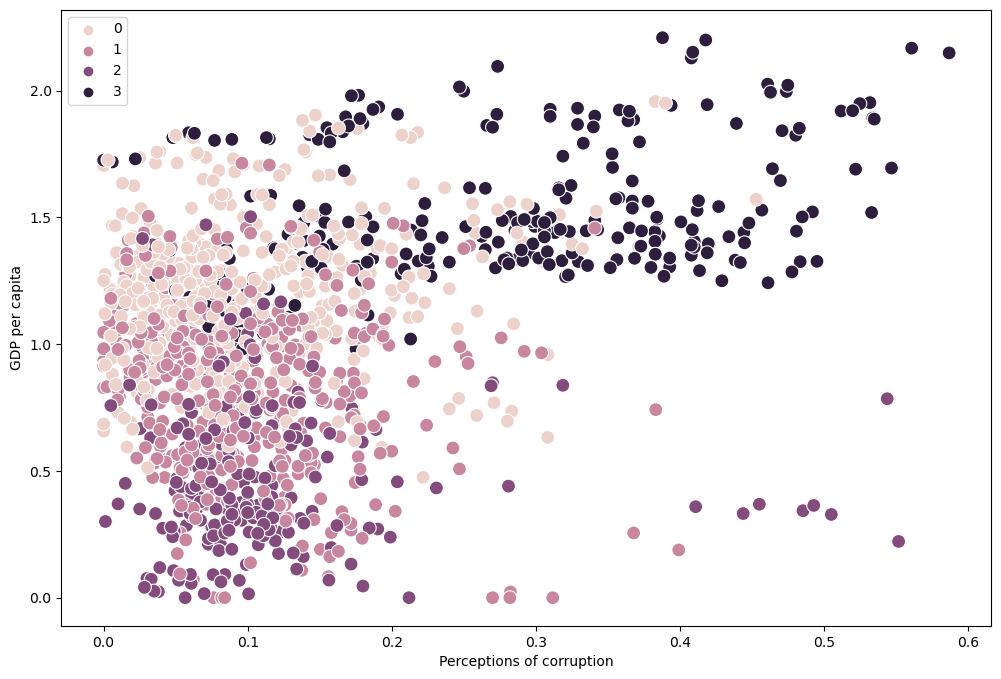

In [24]:
# Plot the clusters for the "perceptions_of_corruption" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['perceptions_of_corruption'], y=df['gdp_per_capita'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Perceptions of corruption') 
plt.ylabel('GDP per capita') 
plt.show()

Comment: the "perceptions of corruption" variable is confusing because it has been reverse-coded: the higher numbers correspond to lower levels of corruption.Therefore, the "0" cluster of light pink dots represent the countries with the least corruption, i.e. Singapore, Finland, Sweden, etc.. It's interesting how strong the association is between low levels of corruption and high GDP per capita.

In [27]:
# export the cleaned whr_df
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'whr_clusters.csv'))

### Create visualizations using the clustered data

/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


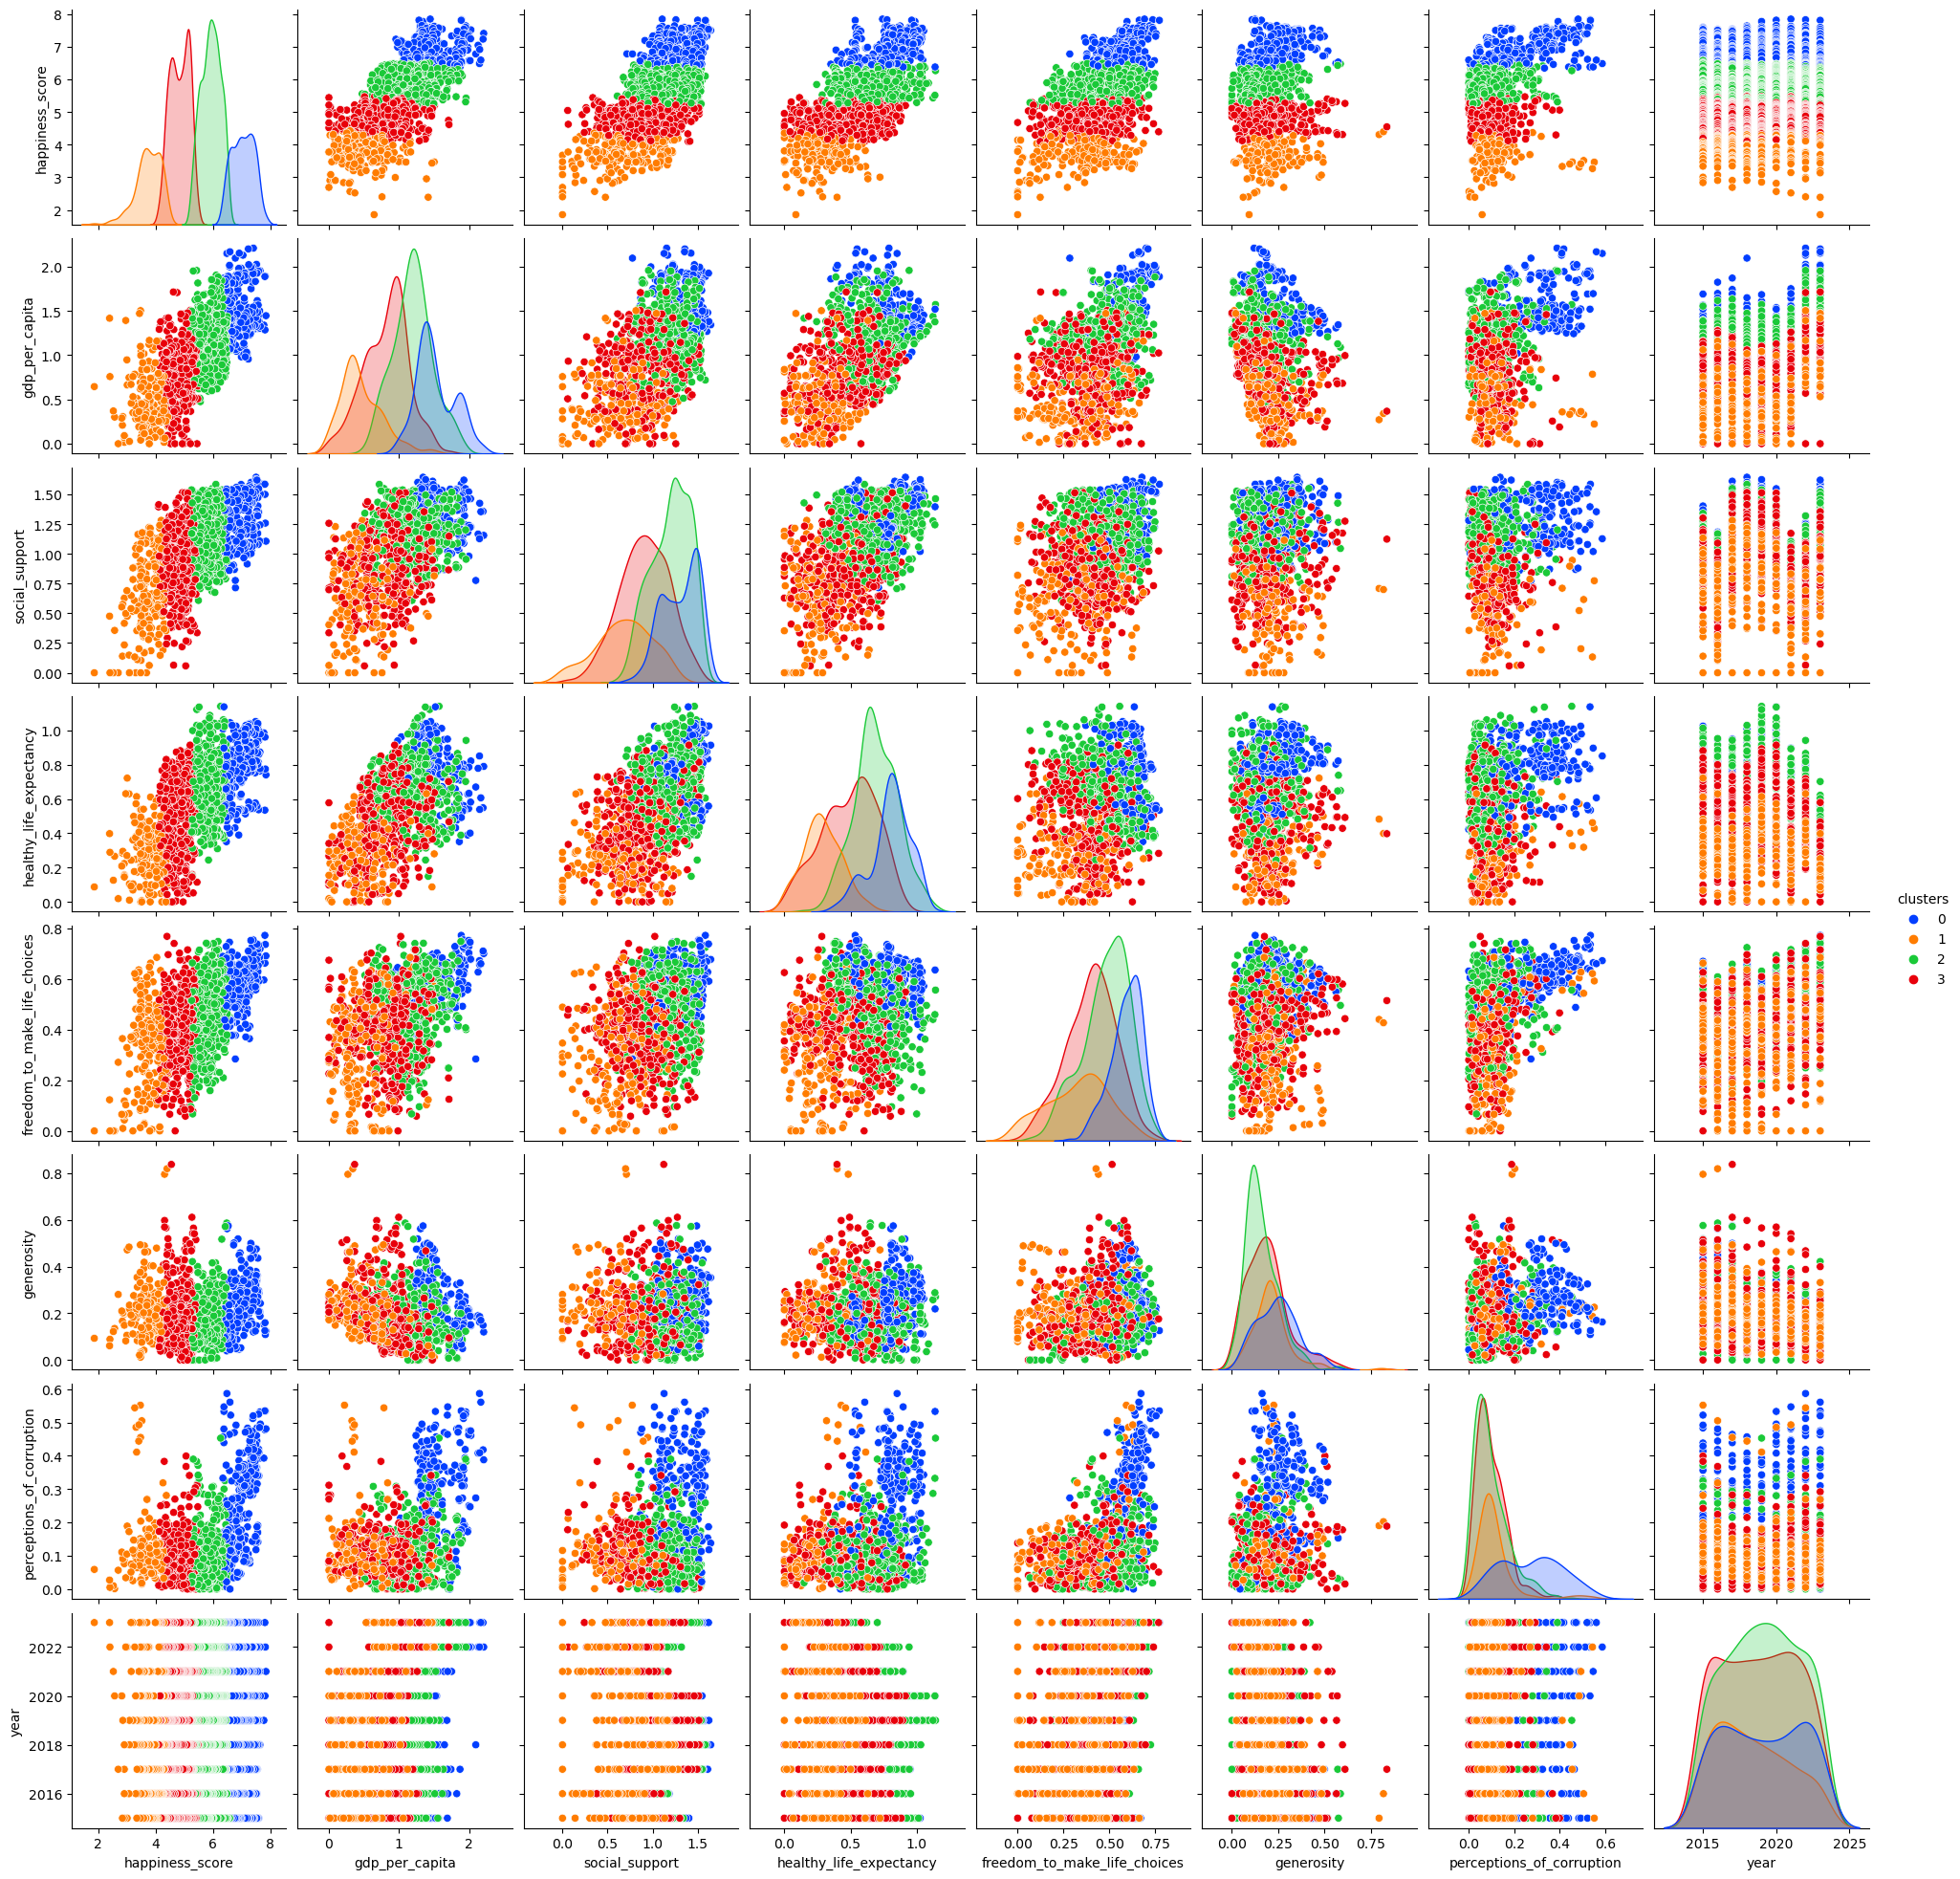

In [64]:
sns.pairplot(df, hue='clusters', palette='bright')
plt.show()

In [68]:
# name the clusters with the colors from the pair plot
df.loc[df['clusters'] == 3, 'cluster'] = 'red'
df.loc[df['clusters'] == 2, 'cluster'] = 'green'
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'

### Calculate descriptive stats

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
# calculate summary stats
df.groupby('cluster').agg({'happiness_score':['mean', 'min', 'max'], 
                         'gdp_per_capita':['mean', 'min', 'max'], 
                         'social_support':['mean', 'min', 'max'],
                          'healthy_life_expectancy':['mean', 'min','max'],
                          'freedom_to_make_life_choices':['mean', 'min', 'max'],
                          'generosity':['mean', 'min', 'max'],
                          'perceptions_of_corruption':['mean', 'min', 'max']})

happiness_score             gdp_per_capita             social_support  \
                   mean   min   max           mean   min   max           mean   
cluster                                                                         
blue               7.03  6.34  7.84           1.52  0.96  2.21           1.31   
green              5.91  5.20  6.57           1.19  0.47  1.96           1.20   
orange             3.73  1.86  4.42           0.46  0.00  1.50           0.68   
red                4.82  4.10  5.47           0.81  0.00  1.71           0.91   

                    healthy_life_expectancy              \
          min   max                    mean   min   max   
cluster                                                   
blue     0.71  1.64                    0.80  0.35  1.14   
green    0.61  1.58                    0.69  0.15  1.14   
orange   0.00  1.28                    0.29  0.00  0.72   
red      0.06  1.52                    0.49  0.00  0.91   

        freedom_to_make_life_choices             generosity              \
                                mean   min   max       mean   min   max   
cluster                                                                   
blue                            0.59  0.28  0.77       0.25  0.04  0.57   
green                           0.48  0.07  0.75       0.16  0.00  0.59   
orange                          0.33  0.00  0.69       0.21  0.01  0.82   
red                             0.40  0.00  0.77       0.19  0.00  0.84   

        perceptions_of_corruption                  
                             mean       min   max  
cluster                                            
blue                         0.27  0.00e+00  0.59  
green                        0.10  0.00e+00  0.45  
orange                       0.11  1.23e-03  0.55  
red                          0.10  0.00e+00  0.40

#### Discuss the summary statistics

This grouping is actually extremely useful because it allows us to check where the country groups fall in every other scatterplot (see pair plot above).

In [ ]:
Looking at the min and max values for happiness score, it's clear how the dots were divided into 4 groups:   

orange min, max = 1.86 - 4.42  
red    min, max = 4.10 - 5.47  
green  min, max = 5.20 - 6.57  
blue   min, max = 6.34 - 7.84

### Propose what these results could be useful for in future steps of an analytics pipeline.

These results are interesting but I feel that it might be more informative to mark the clusters of countries that are true outliers, for example, low GDP but good levels of happiness.

The most important thing that can be done with this data is to determine which combination of factors contributes most to happiness scores. To this end, these cluster results could be used to carry out predictive modeling, to predict future happiness scores for the countries. Or to figure out if it's possible to do a multiple regression, with several of the independent variables together to see how they contribute to happiness. 
